# Udemy

In [652]:
import os
from IPython.display import display, HTML

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [653]:
folders = f"{os.getcwd()}".split('/')[:-1]
folders.extend(['udemy'])
path = os.path.join(*folders)
path = '/'+path
print(path)

/Users/school/Desktop/Github Repositories/CSE-5099/udemy


## Section 1

(1) Linear Regression Example (Age of Universe)

In [654]:
uni_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'hubble.csv')
)

display(HTML(uni_df.to_html()))

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
2,NGC1326A,1794,16.14
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22
6,NGC2541,714,11.22
7,NGC2090,882,11.75
8,NGC3031,80,3.63
9,NGC3198,772,13.80


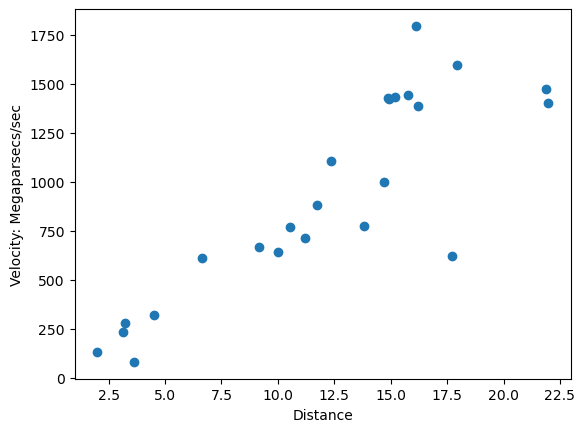

In [655]:
plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

In [656]:
model = smf.ols(
    formula='y~x-1',
    #! -1 means no intercept
    data= uni_df[['x', 'y']]).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              373.1
Date:                Mon, 05 May 2025   Prob (F-statistic):                    1.03e-15
Time:                        12:27:26   Log-Likelihood:                         -166.90
No. Observations:                  24   AIC:                                      335.8
Df Residuals:                      23   BIC:                                      337.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [657]:
beta = model.params.iloc[0]
print(beta)

76.58117202916935


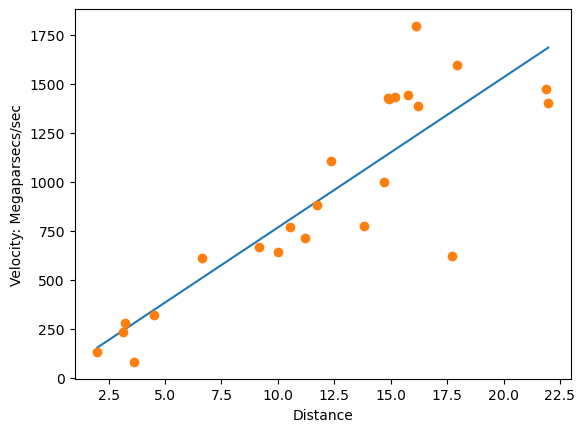

In [658]:
a = np.linspace(uni_df['x'].min(), uni_df['x'].max(), 100)
b = a * beta
plt.plot(a, b)

plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

- Fitted values: measures of Y (mean value of Y)
    - Assumptions ^: Independent residuals and with constant variance
    - DON'T want to see a trend-line go up or down
    - OR DON'T want to see it spread out as values of Y increase or decrease


Here as the mean value of Y increase, its variances also increases

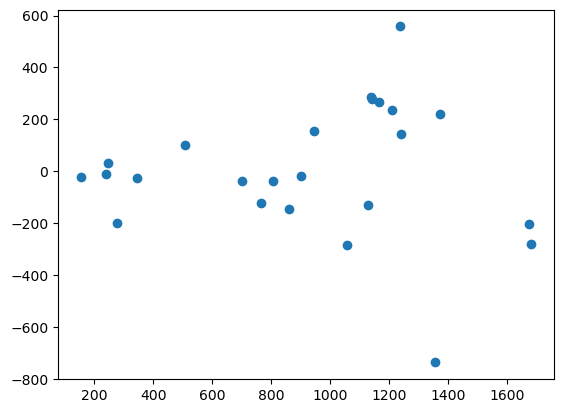

In [659]:
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)

plt.show()

Udemy says to that the most upper and lower points (row 3 & 15) could be outliers and lets fit another model with it not included.

In [660]:
uni_df = uni_df.drop(index=[2,14], axis=1)
display(HTML(uni_df.to_html()))

,Galaxy,y,x
0,NGC0300,133,2.00
1,NGC0925,664,9.16
3,NGC1365,1594,17.95
4,NGC1425,1473,21.88
5,NGC2403,278,3.22
6,NGC2541,714,11.22
7,NGC2090,882,11.75
8,NGC3031,80,3.63
9,NGC3198,772,13.80
10,NGC3351,642,10.00


In [661]:
model2 = smf.ols(
    formula='y~x-1',
    #! -1 means no intercept
    data= uni_df[['x', 'y']]).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.969
Method:                 Least Squares   F-statistic:                              683.8
Date:                Mon, 05 May 2025   Prob (F-statistic):                    1.66e-17
Time:                        12:27:26   Log-Likelihood:                         -145.01
No. Observations:                  22   AIC:                                      292.0
Df Residuals:                      21   BIC:                                      293.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

76.58117202916935


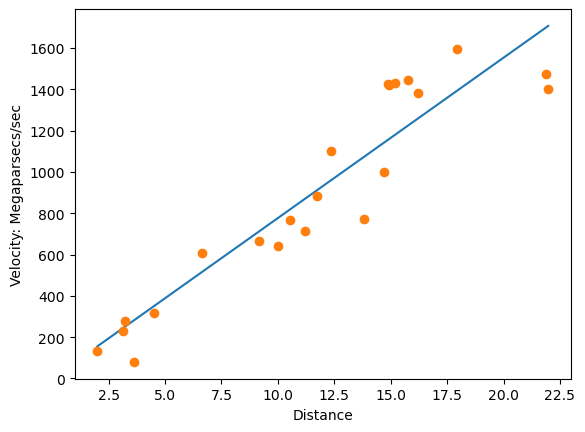

In [662]:
beta2 = model2.params.iloc[0]
print(beta)

a = np.linspace(uni_df['x'].min(), uni_df['x'].max(), 100)
b = a * beta2
plt.plot(a, b)

plt.plot(
    uni_df['x'], # vel
    uni_df['y'], # dist
    'o'
)
plt.xlabel(
    xlabel= "Distance"
)
plt.ylabel(
    ylabel= "Velocity: Megaparsecs/sec"
)

plt.show()

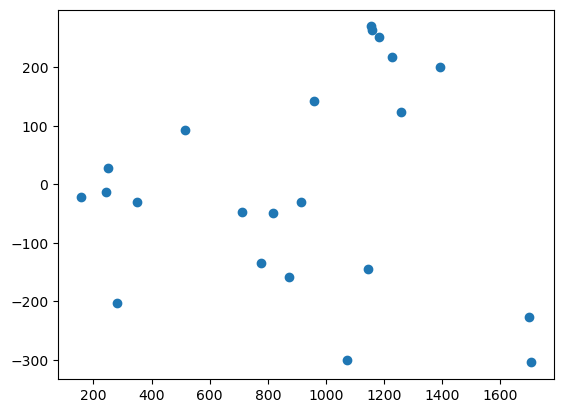

In [663]:
residuals2 = model2.resid
fitted2 = model2.fittedvalues
plt.scatter(fitted2, residuals2)
plt.show()

In [664]:
hubble_const = (beta/3.09e19, beta2/3.09e19)
print(hubble_const)

age = (1/hubble_const[0], 1/hubble_const[1])
age = (age[0]/(60^2*24*365), age[1]/(60^2*24*365))
print(age)

(np.float64(2.478355081850141e-18), np.float64(2.5136866492097877e-18))
(np.float64(23077867360554.043), np.float64(22753492313480.164))


In [665]:
HUBBLE = 4.35*(10^17)
print(age[0]/HUBBLE, age[1]/HUBBLE)

196490994981.30307 193729181042.82816


- How to tell if this is a good estimate?
    - What is the CI

Assumptions of $\hat\beta$
- that error terms $\epsilon = N(0, \sigma^2)$ for all i, which impiles that $Y_{i} = N(x_{i}*\beta, \sigma^2)$

## Section 2
### GLM

**Notes:**


Linear Models
- Assume constant variance at different values of Y
- Assume normally distributed error terms

GLM
- Allow for *specification* of the error distribution
    - Poisson, Binomial, Gamma, Exponential

<img src="error structures.png" width="600" height="500">

Linear predictor $\eta$ is the linear sum of the effects of $\eta_{i} = \sum_{j=1}^{p} x_{ij}*\beta_{j}$

- (1) Predicted Value: $\eta_{i} = \sum_{j=1}^{p} x_{ij}*\beta_{j}$
- (2) Transformed Value
    - (A) $y_{i} = g(\eta_{i})$

Goal: Calculate ODDS of heart attacks based on level of Creatinine supplements.
- Probability: yes/no
- Odds: yes/ (yes + no)

-  Binomial
    - $P(x) = \frac{n!}{(n-x)! x!} * p^{x}*q^{n-x}$
    - p: # of ppl with heart attack / total # of people

<img src="odds.png" width="600" height="500">

In [666]:
heart_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'heart.csv')
)

display(HTML(heart_df.to_html()))

# ck: amount of supplement
# ha: num of patients with heart attack
# ok: num of patients with NO hear attack

,ck,ha,ok
0,20,2,88
1,60,13,26
2,100,30,8
3,140,30,5
4,180,21,0
5,220,19,1
6,260,18,1
7,300,13,1
8,340,19,1
9,380,15,0


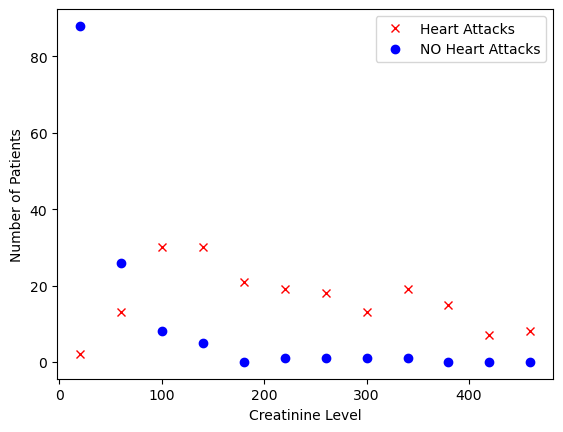

In [667]:
plt.plot(
    heart_df['ck'],
    heart_df['ha'],
    'x',
    label='Heart Attacks',
    color= 'red'
)
plt.plot(
    heart_df['ck'],
    heart_df['ok'],
    'o',
    label='NO Heart Attacks',
    color= 'blue',
)

plt.xlabel(
    xlabel= "Creatinine Level"
)
plt.ylabel(
    ylabel= "Number of Patients"
)

plt.legend()
plt.show()

In [668]:
# calculating p
# p = # of ppl with heart attack / total # of people

heart_df['p'] = heart_df['ha'] / (heart_df['ha'] + heart_df['ok'])
display(HTML(heart_df.to_html()))

,ck,ha,ok,p
0,20,2,88,0.022222
1,60,13,26,0.333333
2,100,30,8,0.789474
3,140,30,5,0.857143
4,180,21,0,1.000000
5,220,19,1,0.950000
6,260,18,1,0.947368
7,300,13,1,0.928571
8,340,19,1,0.950000
9,380,15,0,1.000000


Text(0, 0.5, 'PROPORTION of Heart attack')

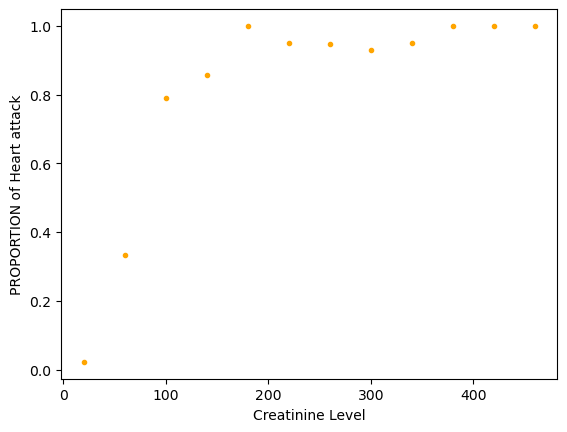

In [669]:
plt.plot(
    heart_df['ck'],
    heart_df['p'],
    '.',
    label='NO Heart Attacks',
    color= 'orange',
)

plt.xlabel(
    xlabel= "Creatinine Level"
)
plt.ylabel(
    ylabel= "PROPORTION of Heart attack"
)

We want the EXPECTED VALUE (mean level) of p

<img src="proportions.png" width="600" height="500">
<img src="proportions2.png" width="600" height="500">

In [670]:
# https://www.statsmodels.org/stable/generated/statsmodels.genmod.generalized_linear_model.GLM.html#statsmodels.genmod.generalized_linear_model.GLM
# https://www.statsmodels.org/stable/glm.html#families

X = heart_df['ck']
X = sm.add_constant(X)

y = heart_df[['ha', 'ok']]


model3 = sm.GLM(
    # 1D array of response (or 2D if binomial [success, failure])
    endog= y,
    
    # NxK array of input data
    exog= X,
    
    #
    family= sm.families.Binomial(),
    
    # offset=None,
    # exposure=None,
    # freq_weights=None,
    # var_weights=None,
    # missing='none',
    # **kwargs
).fit()

print(model3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['ha', 'ok']   No. Observations:                   12
Model:                            GLM   Df Residuals:                       10
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -29.167
Date:                Mon, 05 May 2025   Deviance:                       36.929
Time:                        12:27:26   Pearson chi2:                     205.
No. Iterations:                     7   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7584      0.337     -8.192      0.0

In [671]:
print(model3.deviance) # want it to be small and at least equal to degrees of freedom
print(model3.df_resid)

36.92862296812407
10


In [672]:
B0 = model3.params.iloc[0]
B1= model3.params.iloc[1]

print(f"B0= {B0} | B1= {B1}")

B0= -2.758358203281892 | B1= 0.031243732087198255


In [673]:
X = heart_df['ck']
X = sm.add_constant(X)
y_pred = model3.predict(X)

print(y_pred)

0     0.105885
1     0.292405
2     0.590496
3     0.834210
4     0.946115
5     0.983940
6     0.995344
7     0.998661
8     0.999616
9     0.999890
10    0.999968
11    0.999991
dtype: float64


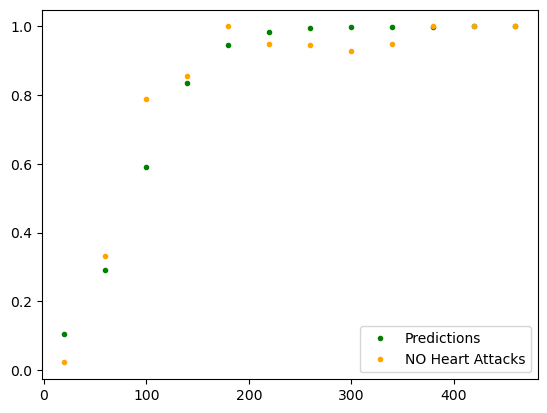

In [674]:
plt.plot(
    heart_df['ck'],
    y_pred,
    '.',
    label='Predictions',
    color= 'green',
)

plt.plot(
    heart_df['ck'],
    heart_df['p'],
    '.',
    label='NO Heart Attacks',
    color= 'orange',
)
plt.legend()
plt.show()

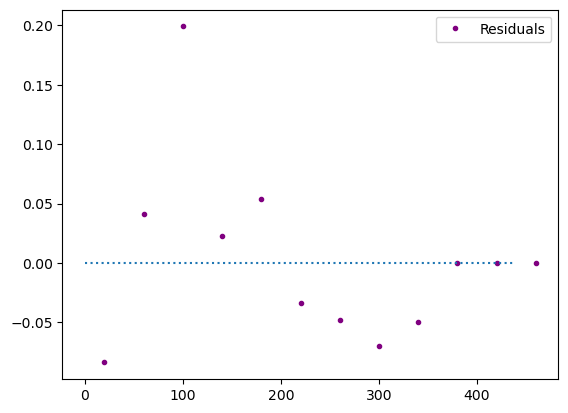

In [675]:
res = heart_df['p'] - y_pred

plt.plot(
    heart_df['ck'],
    res,
    '.',
    label='Residuals',
    color='purple'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

plt.legend()
plt.show()

In [676]:
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

coefficients = np.polyfit(
    x= heart_df['ck'], 
    y= res,
    deg= 3
)
poly_func = np.poly1d(coefficients)

x_fit = np.linspace(heart_df['ck'].min(), heart_df['ck'].max(), 100)
y_fit = poly_func(x_fit)

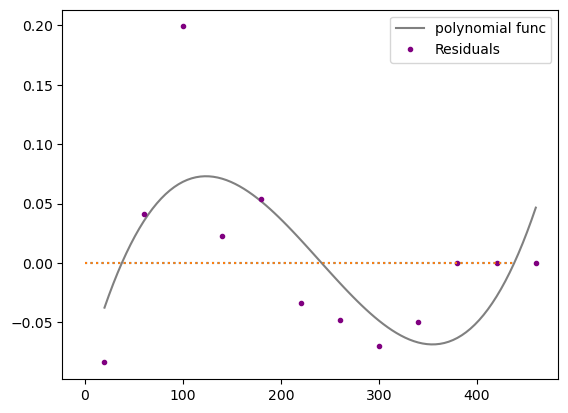

In [677]:
plt.plot(
    x_fit,
    y_fit,
    label='polynomial func',
    color='grey'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

plt.plot(
    heart_df['ck'],
    res,
    '.',
    label='Residuals',
    color='purple'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

plt.legend()
plt.show()

tutorial guy says he wants to plot ck^2 & ck&3 as well

In [678]:
X = np.stack(
    (heart_df['ck'], np.pow(heart_df['ck'], 2), np.pow(heart_df['ck'], 3)) ,
    axis= 1
)
X = sm.add_constant(X)
print(X)

y = heart_df[['ha', 'ok']]


model4 = sm.GLM(
    # 1D array of response (or 2D if binomial [success, failure])
    endog= y,
    
    # NxK array of input data
    exog= X,
    
    #
    family= sm.families.Binomial(),
    
    # offset=None,
    # exposure=None,
    # freq_weights=None,
    # var_weights=None,
    # missing='none',
    # **kwargs
).fit()

print(model4.summary())

[[1.0000e+00 2.0000e+01 4.0000e+02 8.0000e+03]
 [1.0000e+00 6.0000e+01 3.6000e+03 2.1600e+05]
 [1.0000e+00 1.0000e+02 1.0000e+04 1.0000e+06]
 [1.0000e+00 1.4000e+02 1.9600e+04 2.7440e+06]
 [1.0000e+00 1.8000e+02 3.2400e+04 5.8320e+06]
 [1.0000e+00 2.2000e+02 4.8400e+04 1.0648e+07]
 [1.0000e+00 2.6000e+02 6.7600e+04 1.7576e+07]
 [1.0000e+00 3.0000e+02 9.0000e+04 2.7000e+07]
 [1.0000e+00 3.4000e+02 1.1560e+05 3.9304e+07]
 [1.0000e+00 3.8000e+02 1.4440e+05 5.4872e+07]
 [1.0000e+00 4.2000e+02 1.7640e+05 7.4088e+07]
 [1.0000e+00 4.6000e+02 2.1160e+05 9.7336e+07]]
                 Generalized Linear Model Regression Results                  
Dep. Variable:           ['ha', 'ok']   No. Observations:                   12
Model:                            GLM   Df Residuals:                        8
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   

In [679]:
print(model4.deviance) # want it to be small and at least equal to degrees of freedom
print(model4.df_resid)

4.252454150750626
8


In [680]:
X = np.stack(
    (heart_df['ck'], np.pow(heart_df['ck'], 2), np.pow(heart_df['ck'], 3)) ,
    axis= 1
)
X = sm.add_constant(X)
y_pred = model4.predict(X)

print(y_pred)

[0.02270378 0.33029355 0.77424018 0.90913735 0.94007997 0.94424574
 0.94159557 0.94546376 0.96425385 0.98730902 0.99812627 0.99990986]


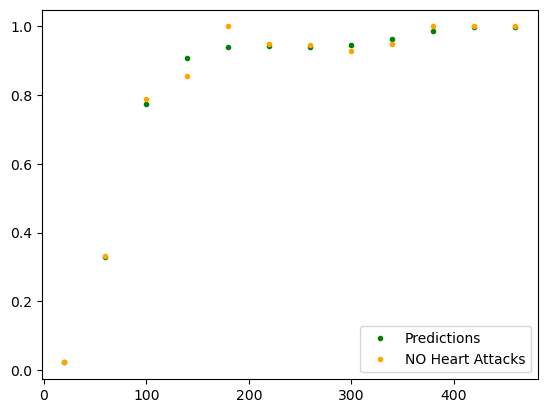

In [681]:
plt.plot(
    heart_df['ck'],
    y_pred,
    '.',
    label='Predictions',
    color= 'green',
)

plt.plot(
    heart_df['ck'],
    heart_df['p'],
    '.',
    label='NO Heart Attacks',
    color= 'orange',
)
plt.legend()
plt.show()

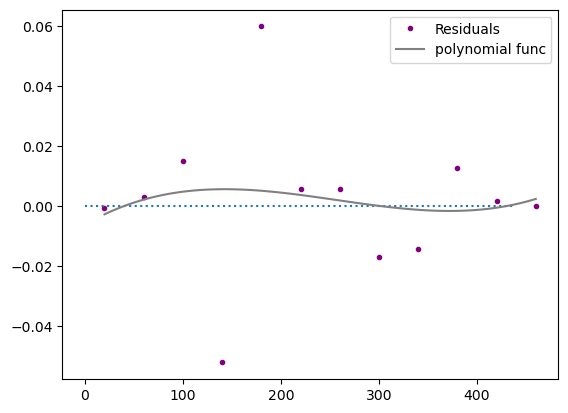

In [682]:
res = heart_df['p'] - y_pred

plt.plot(
    heart_df['ck'],
    res,
    '.',
    label='Residuals',
    color='purple'
)
plt.plot(
    [0 for i in range(heart_df['ck'].min(), heart_df['ck'].max())],
    linestyle='dotted'
)

coefficients = np.polyfit(
    x= heart_df['ck'], 
    y= res,
    deg= 3
)
poly_func = np.poly1d(coefficients)

x_fit = np.linspace(heart_df['ck'].min(), heart_df['ck'].max(), 100)
y_fit = poly_func(x_fit)

plt.plot(
    x_fit,
    y_fit,
    label='polynomial func',
    color='grey'
)

plt.legend()
plt.show()

## Section 2: EXERCISE

- The  first  column  contains  the  counts  of  simple  aberrant  foci  (ACFs)
- [A] Create scatterplot of count ~ endtime.
- [B] Run 2 GLMs
    - [1] specifies count (response) as predicted by endtime (explanatory) & uses a poisson family for distribution.  Plot.
    - [2] 2nd model add endtime^2. Compare 2 models


In [683]:
rat_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'ACF1.csv')
)
display(HTML(rat_df.to_html()))

,count,endtime
0,1,6
1,3,6
2,5,6
3,1,6
4,2,6
5,1,6
6,1,6
7,3,12
8,1,12
9,2,12


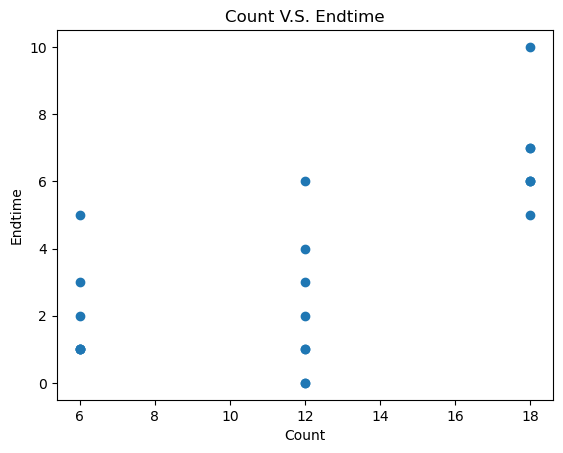

In [684]:
plt.plot(
    rat_df['endtime'],
    rat_df['count'],
    'o'
)
plt.title(
    label= 'Count V.S. Endtime'
)
plt.xlabel(
    xlabel= 'Count'
)
plt.ylabel(
    ylabel= 'Endtime'
)
plt.show()

In [685]:
# GLM 1

X = rat_df['count']
X = sm.add_constant(X)
X = X.to_numpy()

y = rat_df['endtime']
y = y.to_numpy()

ex_m1 = sm.GLM(
    endog= y,
    exog= X,
    family= sm.families.Poisson()
    # offset: Any | None = None,
    # exposure: Any | None = None,
    # freq_weights: Any | None = None,
    # var_weights: Any | None = None,
    # missing: str = 'none',
    # **kwargs: Any
).fit()

print(ex_m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   22
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.084
Date:                Mon, 05 May 2025   Deviance:                       24.711
Time:                        12:27:27   Pearson chi2:                     23.3
No. Iterations:                     4   Pseudo R-squ. (CS):             0.5830
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1104      0.111     18.999      0.0

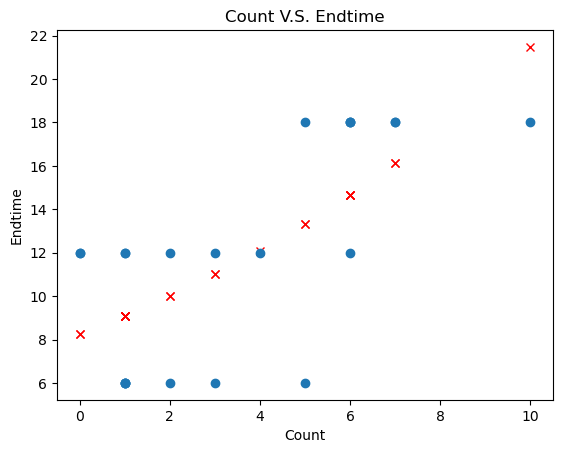

In [686]:
y_pred = ex_m1.predict(X)

plt.plot(
    rat_df['count'],
    y_pred,
    'x',
    color= 'red'
)
plt.plot(
    rat_df['count'],
    rat_df['endtime'],
    'o'
)
plt.title(
    label= 'Count V.S. Endtime'
)
plt.xlabel(
    xlabel= 'Count'
)
plt.ylabel(
    ylabel= 'Endtime'
)
plt.show()

In [687]:
# GLM 1

X2 = np.stack(
    (rat_df['count'], np.pow(rat_df['count'], 2)),
    axis= 1
)
X2 = sm.add_constant(X)

y = rat_df['count']
y = y.to_numpy()

ex_m2 = sm.GLM(
    endog= y,
    exog= X2,
    family= sm.families.Poisson()
    # offset: Any | None = None,
    # exposure: Any | None = None,
    # freq_weights: Any | None = None,
    # var_weights: Any | None = None,
    # missing: str = 'none',
    # **kwargs: Any
).fit()

print(ex_m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   22
Model:                            GLM   Df Residuals:                       20
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -34.109
Date:                Mon, 05 May 2025   Deviance:                       8.3777
Time:                        12:27:27   Pearson chi2:                     6.08
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8566
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0897      0.249      0.360      0.7

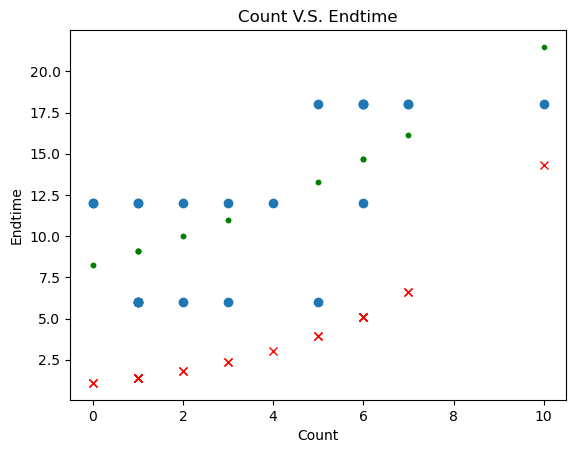

In [688]:
y_pred_2 = ex_m2.predict(X2)
plt.plot(
    rat_df['count'],
    y_pred_2,
    'x',
    color= 'red'
)
y_pred_1 = ex_m1.predict(X)
plt.plot(
    rat_df['count'],
    y_pred_1,
    '.',
    color= 'green'
)


plt.plot(
    rat_df['count'],
    rat_df['endtime'],
    'o'
)
plt.title(
    label= 'Count V.S. Endtime'
)
plt.xlabel(
    xlabel= 'Count'
)
plt.ylabel(
    ylabel= 'Endtime'
)
plt.show()

In [689]:
print(ex_m1.deviance)
print(ex_m1.df_resid)
print(ex_m2.deviance)
print(ex_m2.df_resid)

24.71135725165682
20
8.377659419347953
20


## Section 3: GLM Part 2

- Reviewing "Day 1 Exercises with Solutions"... So I'm gonna do it before the review

### Day 1: Q1
The  R  data  frame  warpbreaks gives  the  number  of  breaks  per fixed  length  of  wool during weaving, for two different wool  types, and 3 different weaving 
tensions. Using a linear model, establish whether there is evidence that the effect  of  tension  on  break  rate  is  dependent on  the  type  of  wool.  If  there is,  use interaction.plot() function to examine the nature of the dependence.

In [690]:
warp_df = pd.read_csv(
    filepath_or_buffer= os.path.join(path, 'warpbreaks.csv')
)
display(HTML(warp_df[:10].to_html()))

,breaks,wool,tension
0,26,A,L
1,30,A,L
2,54,A,L
3,25,A,L
4,70,A,L
5,52,A,L
6,51,A,L
7,26,A,L
8,67,A,L
9,18,A,M


In [691]:
print(warp_df['breaks'].describe(), '\n')
print(warp_df[['wool','tension']].describe())

count    54.000000
mean     28.148148
std      13.198638
min      10.000000
25%      18.250000
50%      26.000000
75%      34.000000
max      70.000000
Name: breaks, dtype: float64 

       wool tension
count    54      54
unique    2       3
top       A       L
freq     27      18


/var/folders/5q/8m769tvj6gv4zvr_fp0tbkx40000gp/T/ipykernel_1792/1317829735.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x= warp_df['tension'].replace(


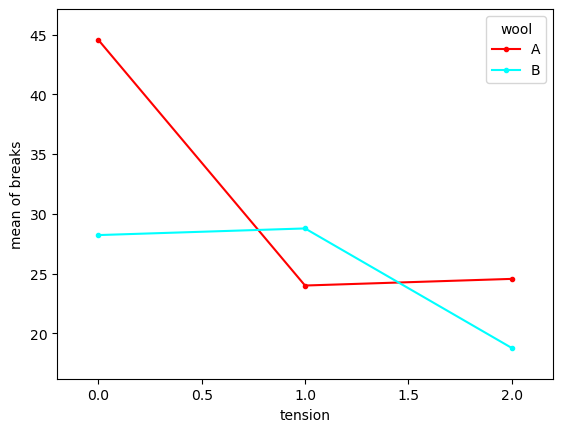

In [692]:
""" 
... evidence that the effect 
of  tension  on  break  rate 
is  dependent on  the  type  of  wool.
"""

fig = sm.graphics.interaction_plot(
    x= warp_df['tension'].replace(
        to_replace= ['L', 'M', 'H'],
        value= [0, 1, 2]
        ),
    
    trace= warp_df['wool'],
    response= warp_df['breaks']
)
plt.show()

^ Classic case of interaction as there is inital cross over for value of Medium and then outward exit.

In [693]:
warp_df = sm.add_constant(warp_df)
print(warp_df[:10])

   const  breaks wool tension
0    1.0      26    A       L
1    1.0      30    A       L
2    1.0      54    A       L
3    1.0      25    A       L
4    1.0      70    A       L
5    1.0      52    A       L
6    1.0      51    A       L
7    1.0      26    A       L
8    1.0      67    A       L
9    1.0      18    A       M


In [694]:
# https://www.statsmodels.org/dev/generated/statsmodels.formula.api.glm.html

""" 
... evidence that the effect 
of  tension  on  break  rate 
is  dependent on  the  type  of  wool.
"""

m = sm.formula.glm(
    formula= 'breaks ~ C(wool) + C(tension) + C(wool)*C(tension)', 
    data= warp_df,
    # subset,
    # drop_cols,
    family= sm.families.Poisson() # try to match Degrees of freedom with deviance
).fit()

print(m.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 breaks   No. Observations:                   54
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -228.48
Date:                Mon, 05 May 2025   Deviance:                       182.31
Time:                        12:27:27   Pearson chi2:                     181.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.8813
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Wool.B, Tension.L, (Wool.B)(Tension.M) p-vals < 0.05
 - Meaning that HAVING AN impact on the model is very likely

I would say that tension dose have an effect on breaks,
as well as wool*tension having an effect on breaks as well.

I suppose that *"evidence that the effect of tension on break is dependent on type of well"* is true for Wool.B & Tension.M. As Tension.M has LITTLE effect on breaks due to its high p-value but when multiplied by Wool.B that effect is VALID to its lower p-value

WHAT GUY SAYS:
- What I said + he used Gaussian instead of Poisson.


### Day 1: Q3

The  following  table  shows  numbers  of  occasions  when  inhibition  (i.e.,  no  flow  of  current across a membrane) occurred within 120 s, for different concentrations of the  protein peptide-C. The outcome yes implies that inhibition has occurred. Use logistic  regression to model the probability of inhibition as a function of protein concentration. Report  and plot your results fully. Interpret your results.

In [695]:
'''
- Use Logistic regression
'''


inhibit_df = pd.DataFrame(
    data = {
        'conc': [.1, .5, 1, 10, 20, 30, 50, 70, 80, 100, 150], # concentration after 120 sec
        'no': [7, 1, 10, 9, 2, 9, 13, 1, 1, 4, 3],
        'yes': [0, 0, 3, 4, 0, 6, 7, 0, 0, 1, 7] # At 120 sec, did inhibition occur?
    }
)
print(inhibit_df)

     conc  no  yes
0     0.1   7    0
1     0.5   1    0
2     1.0  10    3
3    10.0   9    4
4    20.0   2    0
5    30.0   9    6
6    50.0  13    7
7    70.0   1    0
8    80.0   1    0
9   100.0   4    1
10  150.0   3    7


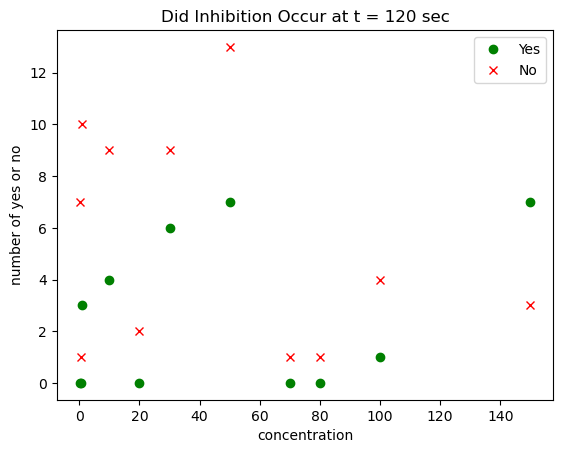

In [696]:
plt.plot(
    inhibit_df['conc'],
    inhibit_df['yes'],
    'o',
    color= 'green',
    label= 'Yes'
)
plt.plot(
    inhibit_df['conc'],
    inhibit_df['no'],
    'x',
    color= 'red',
    label= 'No'
)
plt.title(label= 'Did Inhibition Occur at t = 120 sec')
plt.xlabel(xlabel= 'concentration')
plt.ylabel(ylabel= 'number of yes or no')

plt.legend()
plt.show()

In [697]:
inhibit_df['total'] = inhibit_df['yes']+inhibit_df['no']
inhibit_df['prob_yes'] = inhibit_df['yes']/inhibit_df['total']

print(inhibit_df)

     conc  no  yes  total  prob_yes
0     0.1   7    0      7  0.000000
1     0.5   1    0      1  0.000000
2     1.0  10    3     13  0.230769
3    10.0   9    4     13  0.307692
4    20.0   2    0      2  0.000000
5    30.0   9    6     15  0.400000
6    50.0  13    7     20  0.350000
7    70.0   1    0      1  0.000000
8    80.0   1    0      1  0.000000
9   100.0   4    1      5  0.200000
10  150.0   3    7     10  0.700000


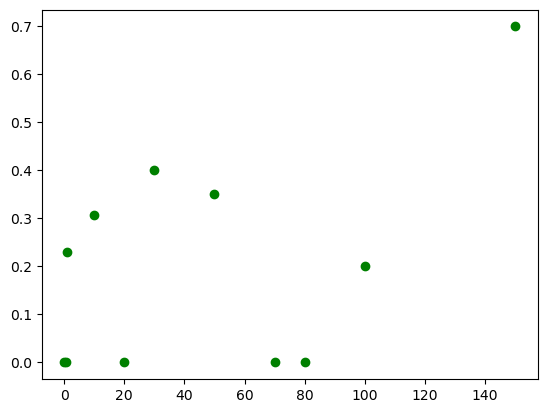

In [698]:
plt.plot(
    inhibit_df['conc'],
    inhibit_df['prob_yes'],
    'o',
    color= 'green',
    label= 'Yes'
)

plt.show()

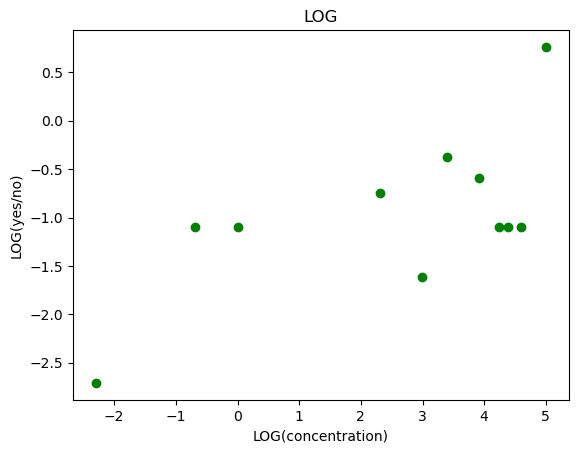

In [699]:
# Udemy
# he adds 0.5 as a constant to all values as you cant do log(0)

plt.plot(
    np.log(inhibit_df['conc']),
    np.log((inhibit_df['yes']+0.5)/(inhibit_df['no']+0.5)),
    'o',
    color= 'green',
    label= 'Yes'
)
plt.xlabel(xlabel='LOG(concentration)')
plt.ylabel(ylabel='LOG(yes/no)')
plt.title(label='LOG')

plt.show()

In [700]:
X = np.log(inhibit_df['conc'])

'''
X = np.stack(
    (inhibit_df['conc'], np.pow(inhibit_df['conc'],3)),
    axis= 1
)
'''

X = sm.add_constant(X)
print(X)
print(X.shape)


    const      conc
0     1.0 -2.302585
1     1.0 -0.693147
2     1.0  0.000000
3     1.0  2.302585
4     1.0  2.995732
5     1.0  3.401197
6     1.0  3.912023
7     1.0  4.248495
8     1.0  4.382027
9     1.0  4.605170
10    1.0  5.010635
(11, 2)


In [701]:
y = inhibit_df['prob_yes']
print(y)

0     0.000000
1     0.000000
2     0.230769
3     0.307692
4     0.000000
5     0.400000
6     0.350000
7     0.000000
8     0.000000
9     0.200000
10    0.700000
Name: prob_yes, dtype: float64


In [702]:
d1_q3 = sm.GLM(
    endog= y,
    exog= X,
    
    var_weights= inhibit_df['total'],

    family= sm.families.Binomial()
).fit()

print(d1_q3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               prob_yes   No. Observations:                   11
Model:                            GLM   Df Residuals:                        9
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -35.744
Date:                Mon, 05 May 2025   Deviance:                       9.3947
Time:                        12:27:28   Pearson chi2:                     7.36
No. Iterations:                     5   Pseudo R-squ. (CS):             0.4845
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7659      0.521     -3.390      0.0

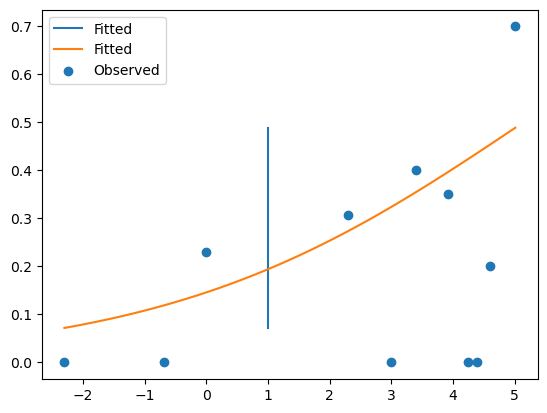

In [703]:
x_m_graph = np.linspace(
    np.log(inhibit_df['conc']).min(),
    np.log(inhibit_df['conc']).max(),
    100
)
x_m_graph = sm.add_constant(x_m_graph)
y_m_graph = d1_q3.predict(x_m_graph)

plt.plot(
    x_m_graph,
    y_m_graph, 
    label='Fitted'
)
plt.scatter(
    np.log(inhibit_df['conc']),
    inhibit_df['prob_yes'],
    label='Observed',
    marker='o'
)


plt.legend()
plt.show()

### Poisson Models with Count

Count as proportions
- we KNOW both how often sometime DID & DID-NOT HAPPEN

Count as frequencies
- we KNOW how often something HAPPENED, but NO INFO on how often it DID-NOT HAPPEN

In [704]:
aids_df = pd.DataFrame(
    data = {
        'time': [i for i in range(1,14)],
        'cases': [12, 14, 33, 50, 67, 74, 123, 141, 165, 204, 253, 246, 240]
    }
)

print(aids_df)

    time  cases
0      1     12
1      2     14
2      3     33
3      4     50
4      5     67
5      6     74
6      7    123
7      8    141
8      9    165
9     10    204
10    11    253
11    12    246
12    13    240


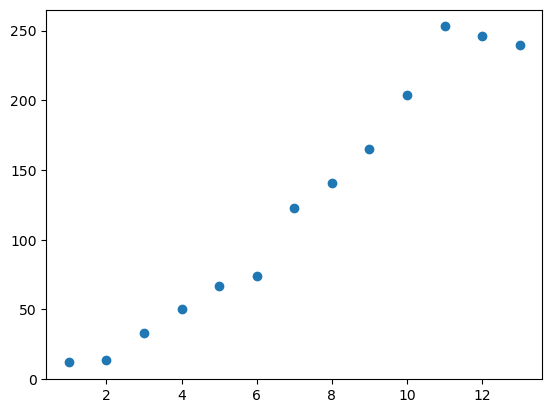

In [705]:
plt.scatter(
    x= aids_df['time'],
    y= aids_df['cases']
)


plt.show()

In [706]:
# mean_i = gamma * e^(delta * time_i)
# LN(mean_i) = LN(gamma) + (delta * time_i)
# y_i ~ Pois(mean_i)

In [707]:
X = np.array(
    object= aids_df['time']
)
X = sm.add_constant(X)
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]]


In [708]:
y = np.array(
    object= aids_df['cases']
)
print(y)

[ 12  14  33  50  67  74 123 141 165 204 253 246 240]


In [709]:
aids_glm = sm.GLM(
    endog= y,
    exog= X,
    family= sm.families.Poisson()
).fit()

print(aids_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   13
Model:                            GLM   Df Residuals:                       11
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -81.185
Date:                Mon, 05 May 2025   Deviance:                       80.686
Time:                        12:27:28   Pearson chi2:                     74.2
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1406      0.078     40.137      0.0

In [710]:
# Residual-Deviance too high. RD is 11x higher then DF-Model

In [711]:
x_input = np.linspace(
    start= aids_df['time'].min(),
    stop= aids_df['time'].max(),
    num= 100
)
x_input = sm.add_constant(x_input)

print(x_input)
print(x_input.shape)

[[ 1.          1.        ]
 [ 1.          1.12121212]
 [ 1.          1.24242424]
 [ 1.          1.36363636]
 [ 1.          1.48484848]
 [ 1.          1.60606061]
 [ 1.          1.72727273]
 [ 1.          1.84848485]
 [ 1.          1.96969697]
 [ 1.          2.09090909]
 [ 1.          2.21212121]
 [ 1.          2.33333333]
 [ 1.          2.45454545]
 [ 1.          2.57575758]
 [ 1.          2.6969697 ]
 [ 1.          2.81818182]
 [ 1.          2.93939394]
 [ 1.          3.06060606]
 [ 1.          3.18181818]
 [ 1.          3.3030303 ]
 [ 1.          3.42424242]
 [ 1.          3.54545455]
 [ 1.          3.66666667]
 [ 1.          3.78787879]
 [ 1.          3.90909091]
 [ 1.          4.03030303]
 [ 1.          4.15151515]
 [ 1.          4.27272727]
 [ 1.          4.39393939]
 [ 1.          4.51515152]
 [ 1.          4.63636364]
 [ 1.          4.75757576]
 [ 1.          4.87878788]
 [ 1.          5.        ]
 [ 1.          5.12121212]
 [ 1.          5.24242424]
 [ 1.          5.36363636]
 

In [712]:
y_predict = aids_glm.predict(x_input)
print(y_predict)
print(y_predict.shape)

[ 28.29572517  28.99751913  29.71671907  30.45375668  31.2090744
  31.98312559  32.77637489  33.58929846  34.42238425  35.27613234
  36.15105519  37.04767798  37.96653892  38.90818955  39.87319512
  40.86213487  41.87560242  42.91420612  43.97856938  45.06933112
  46.18714605  47.33268517  48.50663608  49.70970347  50.94260947
  52.20609416  53.50091595  54.82785206  56.18769899  57.58127302
  59.00941063  60.47296909  61.97282689  63.50988435  65.08506409
  66.69931163  68.35359593  70.04890998  71.78627142  73.5667231
  75.39133376  77.26119863  79.17744011  81.14120844  83.15368239
  85.21606995  87.3296091   89.4955685   91.71524829  93.98998084
  96.32113157  98.71009979 101.15831948 103.66726021 106.23842798
 108.87336617 111.57365641 114.34091956 117.17681671 120.08305013
 123.06136428 126.11354695 129.24143021 132.4468916  135.73185524
 139.09829293 142.54822541 146.08372353 149.7069095  153.41995816
 157.2250983  161.12461397 165.1208459  169.21619285 173.41311309
 177.7141258

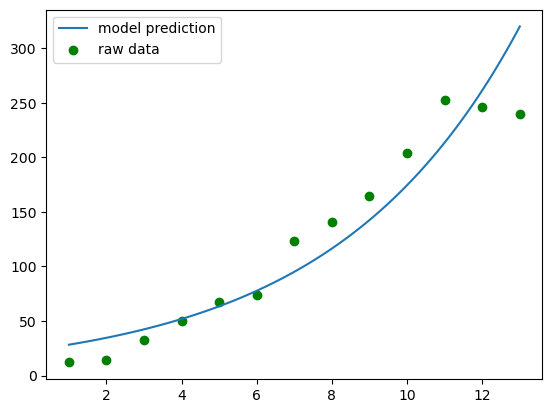

In [713]:
plt.plot(
    x_input[:, 1],
    y_predict,
    label= 'model prediction'
)

plt.scatter(
    x= aids_df['time'],
    y= aids_df['cases'],
    label= 'raw data',
    color= 'green'
)

plt.legend()
plt.show()

In [714]:
# plot residuals

X = np.array(
    object= aids_df['time']
)
X = sm.add_constant(X)
print(X)

[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]]


In [715]:
y = np.array(
    object= aids_df['cases']
)
print(y)
print(y.shape)

[ 12  14  33  50  67  74 123 141 165 204 253 246 240]
(13,)


In [716]:
y_predict_2 = aids_glm.predict(X)
print(y_predict_2)
print(y_predict_2.shape)

[ 28.29572517  34.63386438  42.39172364  51.88731508  63.50988435
  77.73586674  95.14841728 116.46131561 142.54822541 174.47850784
 213.56105703 261.39795465 319.95014281]
(13,)


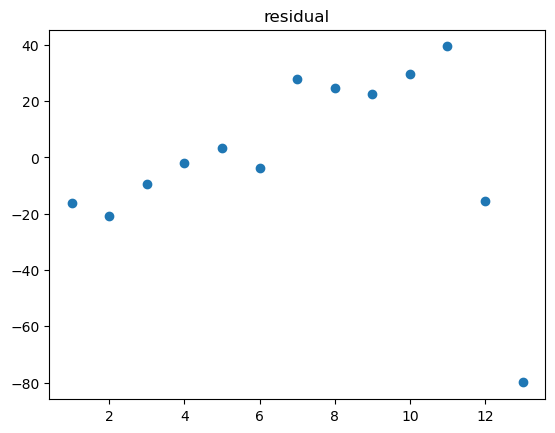

In [717]:
residual = y - y_predict_2

plt.title(label='residual')
plt.scatter(
    x= X[:, 1],
    y= residual
)
plt.show()

In [718]:
# Tweak GLM

print(aids_df)

    time  cases
0      1     12
1      2     14
2      3     33
3      4     50
4      5     67
5      6     74
6      7    123
7      8    141
8      9    165
9     10    204
10    11    253
11    12    246
12    13    240


In [719]:
aids2_glm = sm.formula.glm(
    formula= "y ~ time + I(time**2)",
    data= aids_df,
    family= sm.families.Poisson()
).fit()

print(aids2_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                   13
Model:                            GLM   Df Residuals:                       10
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.462
Date:                Mon, 05 May 2025   Deviance:                       9.2402
Time:                        12:27:28   Pearson chi2:                     9.14
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9015      0.187     10.175   

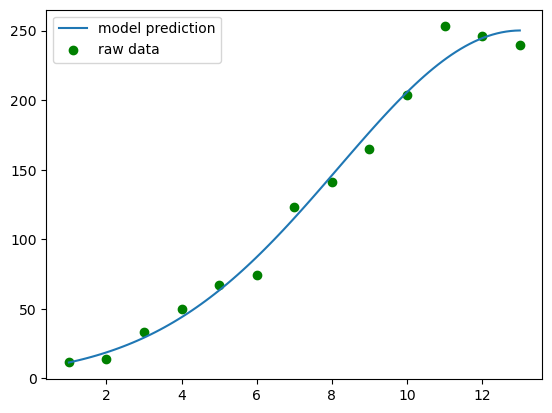

In [720]:
x_input = np.linspace(
    start= aids_df['time'].min(),
    stop= aids_df['time'].max(),
    num= 100
)
x_input = pd.DataFrame(
    data= 
    {
        'time': x_input
    }
)

y_predict_3 = aids2_glm.predict(x_input)

plt.plot(
    x_input,
    y_predict_3,
    label= 'model prediction'
)

plt.scatter(
    x= aids_df['time'],
    y= aids_df['cases'],
    label= 'raw data',
    color= 'green'
)

plt.legend()
plt.show()

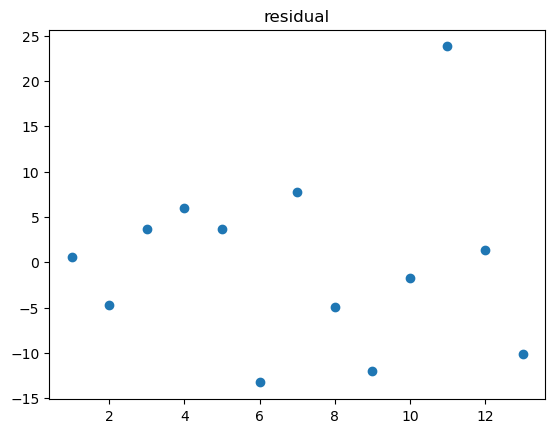

In [722]:
X = aids_df['time']
# X = sm.add_constant(X)

y = np.array(
    object= aids_df['cases']
)
y_predict_4 = aids2_glm.predict(X)

residual = y - y_predict_4

plt.title(label='residual')
plt.scatter(
    x= X,
    y= residual
)
plt.show()

### Binary Response Variable

In [729]:
isolate_df = pd.DataFrame(
    data= {
    'incidence': [
        1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1
        ],
    'area': [
        7.928, 1.925, 2.045, 4.781, 1.536, 7.369, 8.599, 2.422, 6.403, 7.199,
        2.654, 4.128, 4.175, 7.098, 2.392, 8.690, 4.667, 2.307, 1.053, 0.657,
        5.632, 5.895, 4.855, 8.241, 2.898, 4.445, 6.027, 1.574, 2.700, 3.106,
        4.330, 7.799, 4.630, 6.951, 0.859, 3.657, 2.696, 4.171, 8.063, 0.153,
        1.948, 2.006, 6.508, 1.501, 9.269, 4.170, 3.376, 2.228, 1.801, 6.441
        ],
    'isolation': [
        3.317, 7.554, 5.883, 5.932, 5.308, 4.934, 2.882, 8.771, 6.092, 6.977,
        7.748, 4.297, 8.516, 3.318, 9.292, 5.923, 4.997, 2.434, 6.842, 6.452,
        2.506, 6.613, 9.577, 6.330, 6.649, 5.032, 2.023, 5.737, 5.762, 6.924,
        7.262, 3.219, 9.229, 5.841, 9.294, 2.759, 8.342, 8.805, 2.274, 5.650,
        5.447, 5.480, 4.007, 5.400, 5.272, 4.786, 5.219, 7.990, 8.466, 3.451
        ]
    }
)

print(isolate_df)

    incidence   area  isolation
0           1  7.928      3.317
1           0  1.925      7.554
2           1  2.045      5.883
3           0  4.781      5.932
4           0  1.536      5.308
5           1  7.369      4.934
6           1  8.599      2.882
7           0  2.422      8.771
8           1  6.403      6.092
9           1  7.199      6.977
10          0  2.654      7.748
11          1  4.128      4.297
12          0  4.175      8.516
13          1  7.098      3.318
14          0  2.392      9.292
15          1  8.690      5.923
16          1  4.667      4.997
17          1  2.307      2.434
18          1  1.053      6.842
19          0  0.657      6.452
20          1  5.632      2.506
21          1  5.895      6.613
22          0  4.855      9.577
23          1  8.241      6.330
24          1  2.898      6.649
25          1  4.445      5.032
26          1  6.027      2.023
27          0  1.574      5.737
28          0  2.700      5.762
29          0  3.106      6.924
30      

In [731]:
iso_glm = sm.formula.glm(
    formula= 'incidence ~ area * isolation',
    data= isolate_df,
    family= sm.families.Binomial()
).fit()

print(iso_glm.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              incidence   No. Observations:                   50
Model:                            GLM   Df Residuals:                       46
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23.275
Date:                Mon, 05 May 2025   Deviance:                       46.549
Time:                        12:43:09   Pearson chi2:                     51.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3492
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.9762      3.808      2.

In [732]:
iso_glm_2 = sm.formula.glm(
    formula= 'incidence ~ area + isolation',
    data= isolate_df,
    family= sm.families.Binomial()
).fit()

print(iso_glm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              incidence   No. Observations:                   50
Model:                            GLM   Df Residuals:                       47
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24.978
Date:                Mon, 05 May 2025   Deviance:                       49.955
Time:                        12:44:07   Pearson chi2:                     70.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3034
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3226      1.588      1.463      0.1

### Log-Linear Models for Categorical Data



In [736]:
X = np.array(
    object= [
        [435, 147],
        [375, 134],
    ]
)
#        Believer Non-Believer
# Female
# Male
print(X)

[[435 147]
 [375 134]]


In [738]:
# mean_i = E[Y_I] = (total num ppl surveyed)(proportion of M or F)(proportion of B/NB)
# counts -> Pos dist

In [739]:
gr_df = pd.DataFrame(
    data= {
        'y': [435, 147, 375, 134],
        'gender': ['F', 'F', 'M', 'M'],
        'faith': [1, 0, 1, 0]
    }
)
print(gr_df)

     y gender  faith
0  435      F      1
1  147      F      0
2  375      M      1
3  134      M      0


In [744]:
m1 = sm.formula.glm(
    formula= 'y ~ gender + faith',
    data= gr_df,
    family= sm.families.Poisson()
).fit()

print(m1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    4
Model:                            GLM   Df Residuals:                        1
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.704
Date:                Mon, 05 May 2025   Deviance:                      0.16200
Time:                        12:54:16   Pearson chi2:                    0.162
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.0100      0.066     75.871      

In [746]:
y_pred = m1.predict(gr_df)
print(y_pred)

0    432.098992
1    149.901008
2    377.901008
3    131.098992
dtype: float64


In [747]:
residual = gr_df['y'] - y_pred
print(residual)

0    2.901008
1   -2.901008
2   -2.901008
3    2.901008
dtype: float64


In [750]:
m2 = sm.formula.glm(
    formula= 'y ~ gender * faith',
    data= gr_df,
    family= sm.families.Poisson()
).fit()

print(m2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    4
Model:                            GLM   Df Residuals:                        0
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.623
Date:                Mon, 05 May 2025   Deviance:                   1.0214e-14
Time:                        12:57:09   Pearson chi2:                 8.49e-21
No. Iterations:                     4   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             4.9904      0.08

/opt/anaconda3/envs/udemy_glm/lib/python3.12/site-packages/statsmodels/regression/_tools.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  scale = np.dot(wresid, wresid) / df_resid
/opt/anaconda3/envs/udemy_glm/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


In [751]:
y_pred = m2.predict(gr_df)
residual = gr_df['y'] - y_pred
print(residual)

0   -5.684342e-14
1   -1.105320e-10
2    1.421085e-12
3   -1.061466e-09
dtype: float64


### Finished with GLM Portion of the Course